In [1]:
import sklearn
import pandas as pd
import numpy as np
from numpy import mean
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc
from sklearn.model_selection import cross_val_score
from collections import Counter
#from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline
from time import time
from sklearn.model_selection import GridSearchCV

In [2]:
from xgboost import XGBClassifier

### Importantar o dataset
#### O arquivo precisa está na mesma pasta do notebook

In [3]:
dfs = pd.read_csv('suap_gsa_Info_Basica.csv', sep=';'  , engine='python')

In [4]:
dfs.shape

(125, 35)

In [5]:
dfs2 = pd.read_csv('suap_gsa_Filosofia_I.csv', sep=';'  , engine='python')

In [6]:
dfs2.shape

(134, 35)

In [8]:
dfs = dfs.append(dfs2, ignore_index = True) 

In [9]:
dados = dfs.copy()

del dados['Unnamed: 0']

In [11]:
del dados['Codigo Situacao final bimestre']

In [11]:
dados.shape

(259, 34)

In [12]:
dados.columns

Index(['Q1 - Nota', 'Q2 - Nota', 'Q1 - Tempo envio', 'Q2 - Tempo envio',
       'S1 - Tempo ultimo acesso', 'S2 - Tempo ultimo acesso',
       'Ano de Ingresso', 'Idade', 'curso_integrado_MSI',
       'curso_integrado_MUSICA', 'curso_integrado_TED', 'sexo_F', 'sexo_M',
       'cor_raca_Amarela', 'cor_raca_Branca', 'cor_raca_Nao declarada',
       'cor_raca_Parda', 'cor_raca_Preta', 'tipo_escola_origem_Privada',
       'tipo_escola_origem_Publica', 'zona_residencial_Rural',
       'zona_residencial_Urbana', 'cota_SISTEC_Cor/Raca',
       'cota_SISTEC_Escola Publica', 'cota_SISTEC_Nao se aplica',
       'cota_SISTEC_Necessidades Especiais', 'cota_MEC_Nao se aplica',
       'cota_MEC_publica', 'cota_MEC_publica_PPI',
       'cota_MEC_publica_renda_menor_1,5SM',
       'cota_MEC_publica_renda_menor_1,5SM_PCD',
       'cota_MEC_publica_renda_menor_1,5SM_PPI',
       'cota_MEC_publica_renda_menor_1,5SM_PPI_PCD', 'Escola de Origem'],
      dtype='object')

In [13]:
dados.describe()

,Q1 - Nota,Q2 - Nota,Q1 - Tempo envio,Q2 - Tempo envio,S1 - Tempo ultimo acesso,S2 - Tempo ultimo acesso,Ano de Ingresso,Idade,curso_integrado_MSI,curso_integrado_MUSICA,...,cota_SISTEC_Nao se aplica,cota_SISTEC_Necessidades Especiais,cota_MEC_Nao se aplica,cota_MEC_publica,cota_MEC_publica_PPI,"cota_MEC_publica_renda_menor_1,5SM","cota_MEC_publica_renda_menor_1,5SM_PCD","cota_MEC_publica_renda_menor_1,5SM_PPI","cota_MEC_publica_renda_menor_1,5SM_PPI_PCD",Escola de Origem
count,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,...,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000
mean,74.024024,73.306139,19.324324,15.220077,12.486486,13.652510,2019.907336,15.888031,0.351351,0.301158,...,0.474903,0.034749,0.486486,0.054054,0.193050,0.108108,0.007722,0.135135,0.015444,35.610039
std,29.913337,29.206717,25.259794,27.087602,27.083327,28.588142,0.290523,2.140196,0.478317,0.459650,...,0.500337,0.183498,0.500785,0.226562,0.395456,0.311118,0.087704,0.342530,0.123549,26.482817
min,0.000000,0.000000,4.000000,0.000000,1.000000,0.000000,2019.000000,14.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58.888889,60.000000,8.000000,3.000000,3.000000,4.000000,2020.000000,15.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000
50%,88.888889,83.333333,10.000000,6.000000,5.000000,5.000000,2020.000000,16.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000
75%,100.000000,94.166667,12.000000,9.000000,5.000000,5.000000,2020.000000,16.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000
max,100.000000,100.000000,112.000000,100.000000,99.000000,99.000000,2020.000000,36.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,156.000000


In [15]:
dados.head()

,Q1 - Nota,Q2 - Nota,Q1 - Tempo envio,Q2 - Tempo envio,S1 - Tempo ultimo acesso,S2 - Tempo ultimo acesso,Ano de Ingresso,Idade,curso_integrado_MSI,curso_integrado_MUSICA,...,cota_SISTEC_Nao se aplica,cota_SISTEC_Necessidades Especiais,cota_MEC_Nao se aplica,cota_MEC_publica,cota_MEC_publica_PPI,"cota_MEC_publica_renda_menor_1,5SM","cota_MEC_publica_renda_menor_1,5SM_PCD","cota_MEC_publica_renda_menor_1,5SM_PPI","cota_MEC_publica_renda_menor_1,5SM_PPI_PCD",Escola de Origem
0,75.0,80.000000,9.0,1.0,5.0,3.0,2019,17,1,0,...,0,0,0,0,0,1,0,0,0,156
1,50.0,50.000000,8.0,0.0,5.0,4.0,2019,18,1,0,...,0,1,0,0,0,0,0,0,1,70
2,50.0,80.000000,8.0,2.0,5.0,3.0,2019,17,1,0,...,0,0,0,0,0,1,0,0,0,12
3,0.0,0.000000,99.0,99.0,99.0,99.0,2019,18,1,0,...,0,0,0,0,1,0,0,0,0,88
4,40.0,53.333333,8.0,3.0,99.0,5.0,2019,16,0,1,...,0,0,0,0,1,0,0,0,0,68


#### Todas as features

x, y = dados, dfs['Codigo Situacao final bimestre']

### Seleção de campos baseado no feature selection - filter com chi2

#### 15 maiores scores

x, y = dados[[
'Q2 - Tempo envio',
'S1 - Tempo ultimo acesso',
'S2 - Tempo ultimo acesso',
'Q1 - Tempo envio',
'Q2 - Nota',
'Q1 - Nota',
'Escola de Origem',
'curso_integrado_MUSICA',
'cota_SISTEC_Necessidades Especiais',
'cota_SISTEC_Nao se aplica',
'cota_MEC_Nao se aplica',
'curso_integrado_MSI',
'cota_SISTEC_Cor/Raca',
'cota_MEC_publica_PPI',    
'tipo_escola_origem_Privada'
]], dfs['Codigo Situacao final bimestre']

#### 10 maiores scores

In [13]:
x, y = dados[[
'Q2 - Tempo envio',
'S1 - Tempo ultimo acesso',
'S2 - Tempo ultimo acesso',
'Q1 - Tempo envio',
'Q2 - Nota',
'Q1 - Nota',
'Escola de Origem',
'curso_integrado_MUSICA',
'cota_SISTEC_Necessidades Especiais',
'cota_SISTEC_Nao se aplica'
]], dfs['Codigo Situacao final bimestre']

#### 6 maiores scores

x, y = dados[[
'Q2 - Tempo envio',
'S1 - Tempo ultimo acesso',
'S2 - Tempo ultimo acesso',
'Q1 - Tempo envio',
'Q2 - Nota',
'Q1 - Nota'
]], dfs['Codigo Situacao final bimestre']

In [14]:
x.shape

(259, 10)

In [15]:
y.shape

(259,)

#### Algumas funções importantes

In [16]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [17]:
def exibe_metricas(y_test,y_pred,tipo="Teste"):
    print("Métricas - ",tipo)  
    print(confusion_matrix(y_test,y_pred))  
    print(classification_report(y_test,y_pred))  
    print("precisão:", precision_score(y_test, y_pred,average='binary'))
    print("recall:", recall_score(y_test, y_pred,average='binary',pos_label=0))
    print("acurácia:", accuracy_score(y_test, y_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    print("AUC - ROC:", auc(false_positive_rate, true_positive_rate))

In [18]:
def treinar_k_fold_resampling(classificador,resampling, X_treino, y_treino):
    #kf = RepeatedStratifiedKFold(n_splits=8, n_repeats=3, random_state=1)
    kf = StratifiedKFold(n_splits=10)
    all_classes_tests = []
    all_predictions = []
    
    for train_index, test_index in kf.split(X_treino, y_treino):
        treino_kf = X_treino.iloc[train_index]
        classe_treino_kf = y_treino.iloc[train_index]
        teste_kf = X_treino.iloc[test_index]
        classe_teste_kf = y_treino.iloc[test_index]
                
        X_train_res, y_train_res = resampling.fit_resample(treino_kf,classe_treino_kf)
        
        classificador.fit(X_train_res, y_train_res)


In [19]:
def treinar_k_fold(classificador,X_treino, y_treino):
    #kf = RepeatedStratifiedKFold(n_splits=8, n_repeats=3, random_state=1)
    kf = StratifiedKFold(n_splits=10)
    all_classes_tests = []
    all_predictions = []
    
    for train_index, test_index in kf.split(X_treino, y_treino):
        treino_kf = X_treino.iloc[train_index]
        classe_treino_kf = y_treino.iloc[train_index]
        teste_kf = X_treino.iloc[test_index]
        classe_teste_kf = y_treino.iloc[test_index]
        
        classificador.fit(treino_kf,classe_treino_kf)


## Iteração 1 - Divisão Holdout - 70-30 - estratificada

### Divisão dos dados de teste - 30% e treino - 70%

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 10,stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(181, 10) (181,)
(78, 10) (78,)


In [21]:
print(Counter(y))

Counter({1: 194, 0: 65})


In [22]:
print(Counter(y_train))

Counter({1: 136, 0: 45})


In [24]:
print(Counter(y_test))

Counter({1: 58, 0: 20})


## Classificação - Comparação com hold out e sem resampling

In [21]:
clf_MNB = MultinomialNB()
clf_KNN = KNeighborsClassifier()
clf_RF = RandomForestClassifier(random_state=0)
clf_SVM = svm.SVC(kernel='linear',random_state=0) # Linear Kernel
clf_GBM = GradientBoostingClassifier(random_state=0)
clf_XG = XGBClassifier(random_state=0)

for clf in [clf_MNB,clf_KNN,clf_RF, clf_SVM, clf_GBM, clf_XG]:
    clf_name = clf.__class__.__name__
    print('------------------------------ ')
    print('Classificador: ',clf_name)

    clf.fit(X_train, y_train)

    predictions = clf.predict(X_test)

    exibe_metricas(y_test,predictions)
        
    print('------------------------------')
    print('\n')


------------------------------ 
Classificador:  MultinomialNB
Métricas -  Teste
[[ 7 13]
 [ 1 57]]
              precision    recall  f1-score   support

           0       0.88      0.35      0.50        20
           1       0.81      0.98      0.89        58

    accuracy                           0.82        78
   macro avg       0.84      0.67      0.70        78
weighted avg       0.83      0.82      0.79        78

precisão: 0.8142857142857143
recall: 0.35
acurácia: 0.8205128205128205
AUC - ROC: 0.6663793103448277
------------------------------


------------------------------ 
Classificador:  KNeighborsClassifier
Métricas -  Teste
[[10 10]
 [ 1 57]]
              precision    recall  f1-score   support

           0       0.91      0.50      0.65        20
           1       0.85      0.98      0.91        58

    accuracy                           0.86        78
   macro avg       0.88      0.74      0.78        78
weighted avg       0.87      0.86      0.84        78

precisã

pipe = Pipeline([
    ('classificador',dtc_para_pipe )
])

### Comparação com resampling antes k-fold

clf_MNB = MultinomialNB()
clf_KNN = KNeighborsClassifier()
clf_RF = RandomForestClassifier(random_state=0)
clf_SVM = svm.SVC(kernel='linear',random_state=0) # Linear Kernel
clf_GBM = GradientBoostingClassifier(random_state=0)
clf_XG = XGBClassifier(random_state=0)

over = RandomOverSampler(random_state=0)
over_smote = SMOTE(random_state=0)
under = RandomUnderSampler(random_state=0)

for clf in [clf_MNB,clf_KNN,clf_RF, clf_SVM, clf_GBM, clf_XG]:
    clf_name = clf.__class__.__name__
    print('------------------------------ ')
    for resampling in [over_smote, under,over]:
        resampling_name = resampling.__class__.__name__
        print('Classificador: ',clf_name)
        print('Resampling: ',resampling_name)
                        
        X_train_res, y_train_res = resampling.fit_resample(X_train, y_train)

        treinar_k_fold(clf,X_train_res, y_train_res)

        predictions = clf.predict(X_test)

        exibe_metricas(y_test,predictions)
        
        print('------------------------------')
    print('------------------------------')
    print('\n')


### Comparação com resampling após k-fold

In [24]:
clf_MNB = MultinomialNB()
clf_KNN = KNeighborsClassifier()
clf_RF = RandomForestClassifier(random_state=0)
clf_SVM = svm.SVC(kernel='linear',random_state=0) # Linear Kernel
clf_GBM = GradientBoostingClassifier(random_state=0)
clf_XG = XGBClassifier(random_state=0)

over = RandomOverSampler(random_state=0)
over_smote = SMOTE(random_state=0)
under = RandomUnderSampler(random_state=0)

for clf in [clf_MNB,clf_KNN,clf_RF, clf_SVM, clf_GBM, clf_XG]:
    clf_name = clf.__class__.__name__
    print('------------------------------ ')
    for resampling in [over_smote, under,over]:
        resampling_name = resampling.__class__.__name__
        print('Classificador: ',clf_name)
        print('Resampling: ',resampling_name)
       
        treinar_k_fold_resampling(clf,resampling,X_train, y_train)

        predictions = clf.predict(X_test)

        exibe_metricas(y_test,predictions)
        
        print('------------------------------')
    print('------------------------------')
    print('\n')


------------------------------ 
Classificador:  MultinomialNB
Resampling:  SMOTE
Métricas -  Teste
[[ 7 13]
 [ 0 58]]
              precision    recall  f1-score   support

           0       1.00      0.35      0.52        20
           1       0.82      1.00      0.90        58

    accuracy                           0.83        78
   macro avg       0.91      0.68      0.71        78
weighted avg       0.86      0.83      0.80        78

precisão: 0.8169014084507042
recall: 0.35
acurácia: 0.8333333333333334
AUC - ROC: 0.675
------------------------------
Classificador:  MultinomialNB
Resampling:  RandomUnderSampler
Métricas -  Teste
[[ 7 13]
 [ 0 58]]
              precision    recall  f1-score   support

           0       1.00      0.35      0.52        20
           1       0.82      1.00      0.90        58

    accuracy                           0.83        78
   macro avg       0.91      0.68      0.71        78
weighted avg       0.86      0.83      0.80        78

precisão: 

Métricas -  Teste
[[14  6]
 [ 2 56]]
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        20
           1       0.90      0.97      0.93        58

    accuracy                           0.90        78
   macro avg       0.89      0.83      0.86        78
weighted avg       0.90      0.90      0.89        78

precisão: 0.9032258064516129
recall: 0.7
acurácia: 0.8974358974358975
AUC - ROC: 0.8327586206896551
------------------------------
Classificador:  XGBClassifier
Resampling:  RandomUnderSampler
Métricas -  Teste
[[15  5]
 [ 5 53]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        20
           1       0.91      0.91      0.91        58

    accuracy                           0.87        78
   macro avg       0.83      0.83      0.83        78
weighted avg       0.87      0.87      0.87        78

precisão: 0.9137931034482759
recall: 0.75
acurácia: 0.8717948717948718
AUC - RO

#### Teste com combinação de over + under - Sem sucesso

classificador = RandomForestClassifier(random_state=0)

#over = RandomOverSampler(random_state=0)

#over = SMOTE()
under = RandomUnderSampler()
steps = [('u', under)]
pipeline = Pipeline(steps=steps)

treinar_k_fold(classificador,pipeline,X_train, y_train)

predictions = classificador.predict(X_test)

exibe_metricas(y_test,predictions)

classificador = XGBClassifier(random_state=0)

over = SMOTE(sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=0.7)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

treinar_k_fold(classificador,pipeline,X_train, y_train)

y_pred = classificador.predict(X_test)
predictions = [round(value) for value in y_pred]

exibe_metricas(y_test,predictions)

classificador = svm.SVC(kernel='linear',random_state=0) # Linear Kernel

over = SMOTE(sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=0.7)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

treinar_k_fold(classificador,pipeline,X_train, y_train)

predictions = classificador.predict(X_test)

exibe_metricas(y_test,predictions)

classificador = GradientBoostingClassifier(random_state=0)

over = SMOTE()
under = RandomUnderSampler()
steps = [('o', over), ('u', under)]
#steps = [('u', under)]
pipeline = Pipeline(steps=steps)

treinar_k_fold_resampling(classificador,pipeline,X_train, y_train)

predictions = classificador.predict(X_test)

exibe_metricas(y_test,predictions)

### Tunning Hyperparametros - Melhores algoritmos

#### SVC

over_smote = SMOTE(random_state=0);
X_train_res, y_train_res = over_smote.fit_resample(X_train,y_train)

svc = svm.SVC(kernel='linear',random_state=0)

hyperparameters = { 'C':[0.01,1,10,100],
                   'kernel':['linear','poly'],
                   'gamma':[0.1,1,10,100]
                  }

clf = GridSearchCV(svc, hyperparameters, cv=5)

clf.fit(X_train_res, y_train_res)

print(clf.best_params_)

svc_tunned = svm.SVC(kernel='poly',random_state=0)

over_smote = SMOTE(random_state=0);
X_train_res, y_train_res = over_smote.fit_resample(X_train,y_train)
treinar_k_fold(svc_tunned,X_train_res, y_train_res)
predictions = svc_tunned.predict(X_test)
exibe_metricas(y_test,predictions)

#### Gradient

In [20]:
gbm = GradientBoostingClassifier(random_state=0)

hyperparameters = { 'learning_rate':[0.5, 0.1, 0.05, 0.01],
                   'n_estimators':[ 8, 16, 32, 64, 100],
                   'max_depth':[1,5,10],
                  }

clf = GridSearchCV(gbm, hyperparameters, cv=5)

clf.fit(X_train, y_train)

print(clf.best_params_)

{'learning_rate': 0.5, 'max_depth': 1, 'n_estimators': 32}


In [21]:
gbm_tunned =  GradientBoostingClassifier(random_state=0, learning_rate=0.1, max_depth=2,n_estimators=32)

In [22]:
over = RandomOverSampler(random_state=0)
X_train_res, y_train_res = over.fit_resample(X_train,y_train)
treinar_k_fold(gbm_tunned,X_train_res, y_train_res)
predictions = gbm_tunned.predict(X_test)
exibe_metricas(y_test,predictions)

Métricas -  Teste
[[ 8  2]
 [ 1 30]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.94      0.97      0.95        31

    accuracy                           0.93        41
   macro avg       0.91      0.88      0.90        41
weighted avg       0.93      0.93      0.93        41

precisão: 0.9375
recall: 0.8
AUC - ROC: 0.8838709677419355


#### XGradient Boost

In [23]:
xgbm = XGBClassifier(random_state=0)

hyperparameters = { 'learning_rate':[0.5, 0.1, 0.01],
                   'n_estimators':[64, 100, 300],
                   'max_depth':[3,5,10],
                  }

clf = GridSearchCV(xgbm, hyperparameters, cv=5)

clf.fit(X_train, y_train)

print(clf.best_params_)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 64}


n_estimators=300, learning_rate=0.1,subsample= 0.5
dtcXG = XGBClassifier()


In [24]:
xgbm_tunned =  XGBClassifier(random_state=0,learning_rate=0.5, max_depth=3, n_estimators=64,subsample=0.5)

In [25]:
treinar_k_fold(xgbm_tunned,X_train, y_train)
predictions_xbgm = xgbm_tunned.predict(X_test)
exibe_metricas(y_test,predictions_xbgm)

Métricas -  Teste
[[ 7  3]
 [ 0 31]]
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.91      1.00      0.95        31

    accuracy                           0.93        41
   macro avg       0.96      0.85      0.89        41
weighted avg       0.93      0.93      0.92        41

precisão: 0.9117647058823529
recall: 0.7
AUC - ROC: 0.85


#### MultinomialNB

In [26]:
mnb = MultinomialNB()

hyperparameters = { 'alpha':[0.01,0.1,1],
                   'fit_prior':[True,False]
                  }

clf = GridSearchCV(mnb, hyperparameters, cv=5)

clf.fit(X_train,y_train)

print(clf.best_params_)

{'alpha': 0.01, 'fit_prior': True}


In [27]:
mnb_tunned = MultinomialNB(alpha=0.01)

In [28]:
over_smote = SMOTE(random_state=0);
X_train_res, y_train_res = over_smote.fit_resample(X_train,y_train)
treinar_k_fold(mnb_tunned,X_train_res, y_train_res)
predictions = mnb_tunned.predict(X_test)
exibe_metricas(y_test,predictions)

Métricas -  Teste
[[ 5  5]
 [ 0 31]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.86      1.00      0.93        31

    accuracy                           0.88        41
   macro avg       0.93      0.75      0.80        41
weighted avg       0.89      0.88      0.86        41

precisão: 0.8611111111111112
recall: 0.5
AUC - ROC: 0.75


## Feature Select

### Filter - Univariate Select

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [21]:
#apply SelectKBest class to extract top 25 best features
bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Atributo','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 15 best features

                              Atributo        Score
5             S2 - Tempo ultimo acesso  4505.666005
3                     Q2 - Tempo envio  3410.322322
4             S1 - Tempo ultimo acesso  3360.770395
2                     Q1 - Tempo envio  1520.140859
1                            Q2 - Nota  1472.422154
0                            Q1 - Nota  1384.504128
33                    Escola de Origem    65.251217
9               curso_integrado_MUSICA    14.190707
25  cota_SISTEC_Necessidades Especiais    13.287373
24           cota_SISTEC_Nao se aplica    10.890892
26              cota_MEC_Nao se aplica     9.026201
8                  curso_integrado_MSI     8.191960
22                cota_SISTEC_Cor/Raca     7.680206
28                cota_MEC_publica_PPI     7.599875
18          tipo_escola_origem_Privada     5.981571


### Feature Importance do melhor modelo

Métricas -  Teste
[[16  4]
 [ 1 57]]
              precision    recall  f1-score   support

           0       0.94      0.80      0.86        20
           1       0.93      0.98      0.96        58

    accuracy                           0.94        78
   macro avg       0.94      0.89      0.91        78
weighted avg       0.94      0.94      0.93        78

precisão: 0.9344262295081968
recall: 0.8
acurácia: 0.9358974358974359
AUC - ROC: 0.8913793103448276


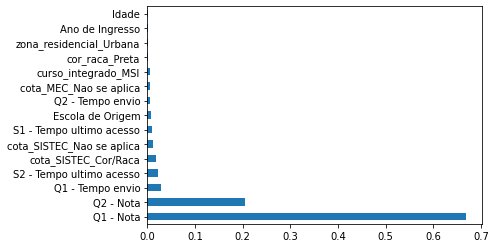

In [25]:
import matplotlib.pyplot as plt

clf_GBM = GradientBoostingClassifier(random_state=0)
over_smote = SMOTE(random_state=0)
# fit and apply the transform

treinar_k_fold_resampling(clf_GBM,over_smote,X_train, y_train)


dtc_predictionsG = clf_GBM.predict(X_test)

exibe_metricas(y_test,dtc_predictionsG)


#plot graph of feature importances for better visualization
feat_importances = pd.Series(clf_GBM.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

#### Matriz de confusão

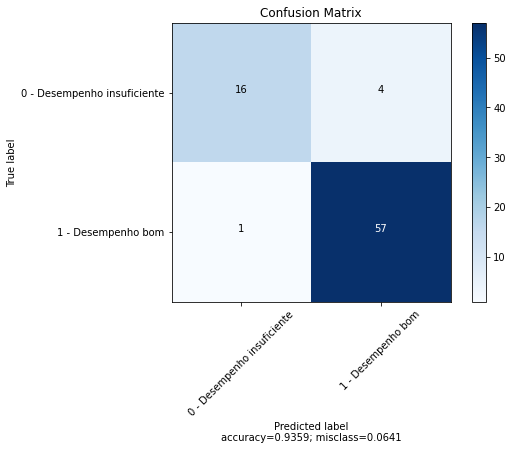

In [27]:
plot_confusion_matrix(cm           = confusion_matrix(y_test,dtc_predictionsG), 
                      normalize    = False,
                      target_names = ['0 - Desempenho insuficiente', '1 - Desempenho bom'],
                      title        = "Confusion Matrix")

Métricas -  Teste
[[16  4]
 [ 4 54]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        20
           1       0.93      0.93      0.93        58

    accuracy                           0.90        78
   macro avg       0.87      0.87      0.87        78
weighted avg       0.90      0.90      0.90        78

precisão: 0.9310344827586207
recall: 0.8
acurácia: 0.8974358974358975
AUC - ROC: 0.8655172413793103


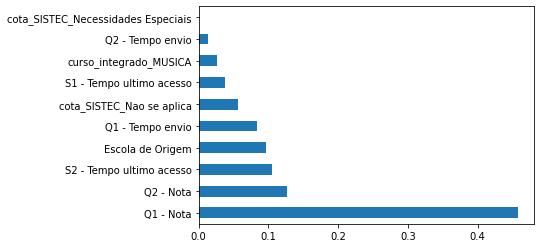

In [25]:
import matplotlib.pyplot as plt

clf_GBM = XGBClassifier(random_state=0)
under = RandomUnderSampler(random_state=0)
# fit and apply the transform

treinar_k_fold_resampling(clf_GBM,under,X_train, y_train)


dtc_predictionsG = clf_GBM.predict(X_test)

exibe_metricas(y_test,dtc_predictionsG)


#plot graph of feature importances for better visualization
feat_importances = pd.Series(clf_GBM.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

#### Matriz de confusão

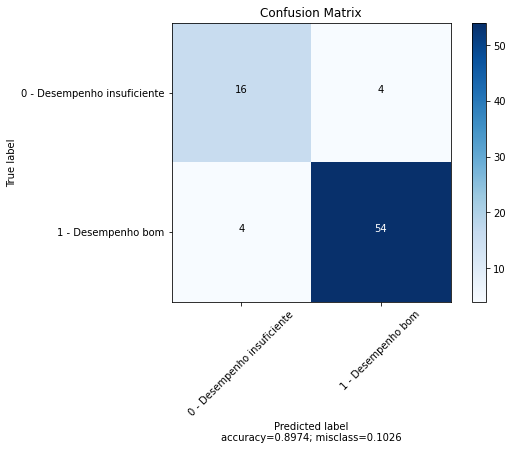

In [26]:
plot_confusion_matrix(cm           = confusion_matrix(y_test,dtc_predictionsG), 
                      normalize    = False,
                      target_names = ['0 - Desempenho insuficiente', '1 - Desempenho bom'],
                      title        = "Confusion Matrix")

Métricas -  Teste
[[16  4]
 [ 4 54]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        20
           1       0.93      0.93      0.93        58

    accuracy                           0.90        78
   macro avg       0.87      0.87      0.87        78
weighted avg       0.90      0.90      0.90        78

precisão: 0.9310344827586207
recall: 0.8
acurácia: 0.8974358974358975
AUC - ROC: 0.8655172413793103


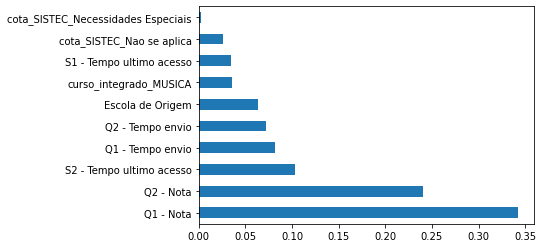

In [27]:
import matplotlib.pyplot as plt

clf_RF = RandomForestClassifier(random_state=0)
under = RandomUnderSampler(random_state=0)
# fit and apply the transform

treinar_k_fold_resampling(clf_RF,under,X_train, y_train)


dtc_predictionsR = clf_RF.predict(X_test)

exibe_metricas(y_test,dtc_predictionsR)


#plot graph of feature importances for better visualization
feat_importances = pd.Series(clf_RF.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

#### Matriz de confusão

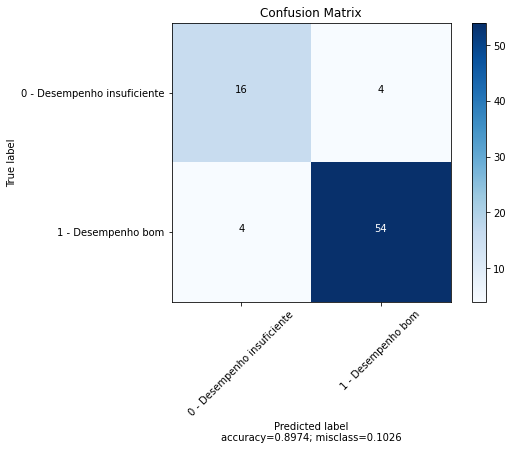

In [28]:
plot_confusion_matrix(cm           = confusion_matrix(y_test,dtc_predictionsR), 
                      normalize    = False,
                      target_names = ['0 - Desempenho insuficiente', '1 - Desempenho bom'],
                      title        = "Confusion Matrix")

gbcCV = GradientBoostingClassifier(random_state=0)

from sklearn.feature_selection import RFECV


gbcCV = XGBClassifier()
rfecv = RFECV(estimator=gbcCV, step=2, cv=StratifiedKFold(10), scoring='recall')
rfecv.fit(x, y)

print('Optimal number of features: {}'.format(rfecv.n_features_))

X = x.copy()

print(np.where(rfecv.support_ == False)[0])

X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

import matplotlib.pyplot as plt

dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()